In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn import metrics
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler


In [88]:
!pip install umap-learn

In [89]:
import umap

In [188]:
food = pd.read_csv('fastfood.csv')
food.shape

(515, 17)

In [189]:
food.head()

restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium  salad  
0     11     37.0    4.0   20.0     20.0  Other  
1     18     46.0    6.0   20.0     20.0  Other  
2     18     70.0   10.0   20.0     50.0  Other  
3     18     55.0    6.0   25.0     20.0  Other  
4     18     46.0    6.0   20.0     20.0  Other

In [190]:
### Missing value

In [191]:
food.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [192]:
#food[food['vit_a'].isnull()]

In [193]:
food = food.fillna(0)

In [194]:
food.isnull().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64

In [195]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        515 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      515 non-null    float64
 13  vit_a        515 non-null    float64
 14  vit_c        515 non-null    float64
 15  calcium      515 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [196]:
food=food.drop(columns=['salad'])

In [197]:
food_1 = food.drop(columns=['restaurant', 'item'])

In [198]:
food_1.describe()

calories      cal_fat   total_fat     sat_fat   trans_fat  \
count   515.000000   515.000000  515.000000  515.000000  515.000000   
mean    530.912621   238.813592   26.590291    8.153398    0.465049   
std     282.436147   166.407510   18.411876    6.418811    0.839644   
min      20.000000     0.000000    0.000000    0.000000    0.000000   
25%     330.000000   120.000000   14.000000    4.000000    0.000000   
50%     490.000000   210.000000   23.000000    7.000000    0.000000   
75%     690.000000   310.000000   35.000000   11.000000    1.000000   
max    2430.000000  1270.000000  141.000000   47.000000    8.000000   

       cholesterol       sodium  total_carb       fiber       sugar  \
count   515.000000   515.000000  515.000000  515.000000  515.000000   
mean     72.456311  1246.737864   45.664078    4.040777    7.262136   
std      63.160406   689.954278   24.883342    3.066114    6.761301   
min       0.000000    15.000000    0.000000    0.000000    0.000000   
25%      35.000000   800.000000   28.500000    2.000000    3.000000   
50%      60.000000  1110.000000   44.000000    3.000000    6.000000   
75%      95.000000  1550.000000   57.000000    5.000000    9.000000   
max     805.000000  6080.000000  156.000000   17.000000   87.000000   

          protein       vit_a       vit_c     calcium  
count  515.000000  515.000000  515.000000  515.000000  
mean    27.836893   11.021359   11.945631   14.718447  
std     17.709409   25.718045   25.533547   23.123513  
min      0.000000    0.000000    0.000000    0.000000  
25%     15.500000    0.000000    0.000000    0.000000  
50%     24.000000    2.000000    2.000000    6.000000  
75%     36.000000   15.000000   15.000000   25.000000  
max    186.000000  180.000000  400.000000  290.000000

In [199]:
### Scaling

In [200]:
from sklearn.preprocessing import MinMaxScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('min_max_scaler', MinMaxScaler())
])


food_SCALED = pipeline.fit_transform(food_1)
food_df = pd.DataFrame(food_SCALED, columns=food_.columns)

In [201]:
food_df.describe()

calories     cal_fat   total_fat     sat_fat   trans_fat  \
count  515.000000  515.000000  515.000000  515.000000  515.000000   
mean     0.211997    0.188042    0.188584    0.173477    0.058131   
std      0.117193    0.131030    0.130581    0.136570    0.104955   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.128631    0.094488    0.099291    0.085106    0.000000   
50%      0.195021    0.165354    0.163121    0.148936    0.000000   
75%      0.278008    0.244094    0.248227    0.234043    0.125000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       cholesterol      sodium  total_carb       fiber       sugar  \
count   515.000000  515.000000  515.000000  515.000000  515.000000   
mean      0.090008    0.203090    0.292718    0.237693    0.083473   
std       0.078460    0.113760    0.159509    0.180360    0.077716   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.043478    0.129431    0.182692    0.117647    0.034483   
50%       0.074534    0.180544    0.282051    0.176471    0.068966   
75%       0.118012    0.253092    0.365385    0.294118    0.103448   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

          protein       vit_a       vit_c     calcium  
count  515.000000  515.000000  515.000000  515.000000  
mean     0.149661    0.061230    0.029864    0.050753  
std      0.095212    0.142878    0.063834    0.079736  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.083333    0.000000    0.000000    0.000000  
50%      0.129032    0.011111    0.005000    0.020690  
75%      0.193548    0.083333    0.037500    0.086207  
max      1.000000    1.000000    1.000000    1.000000

### Pairplots

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


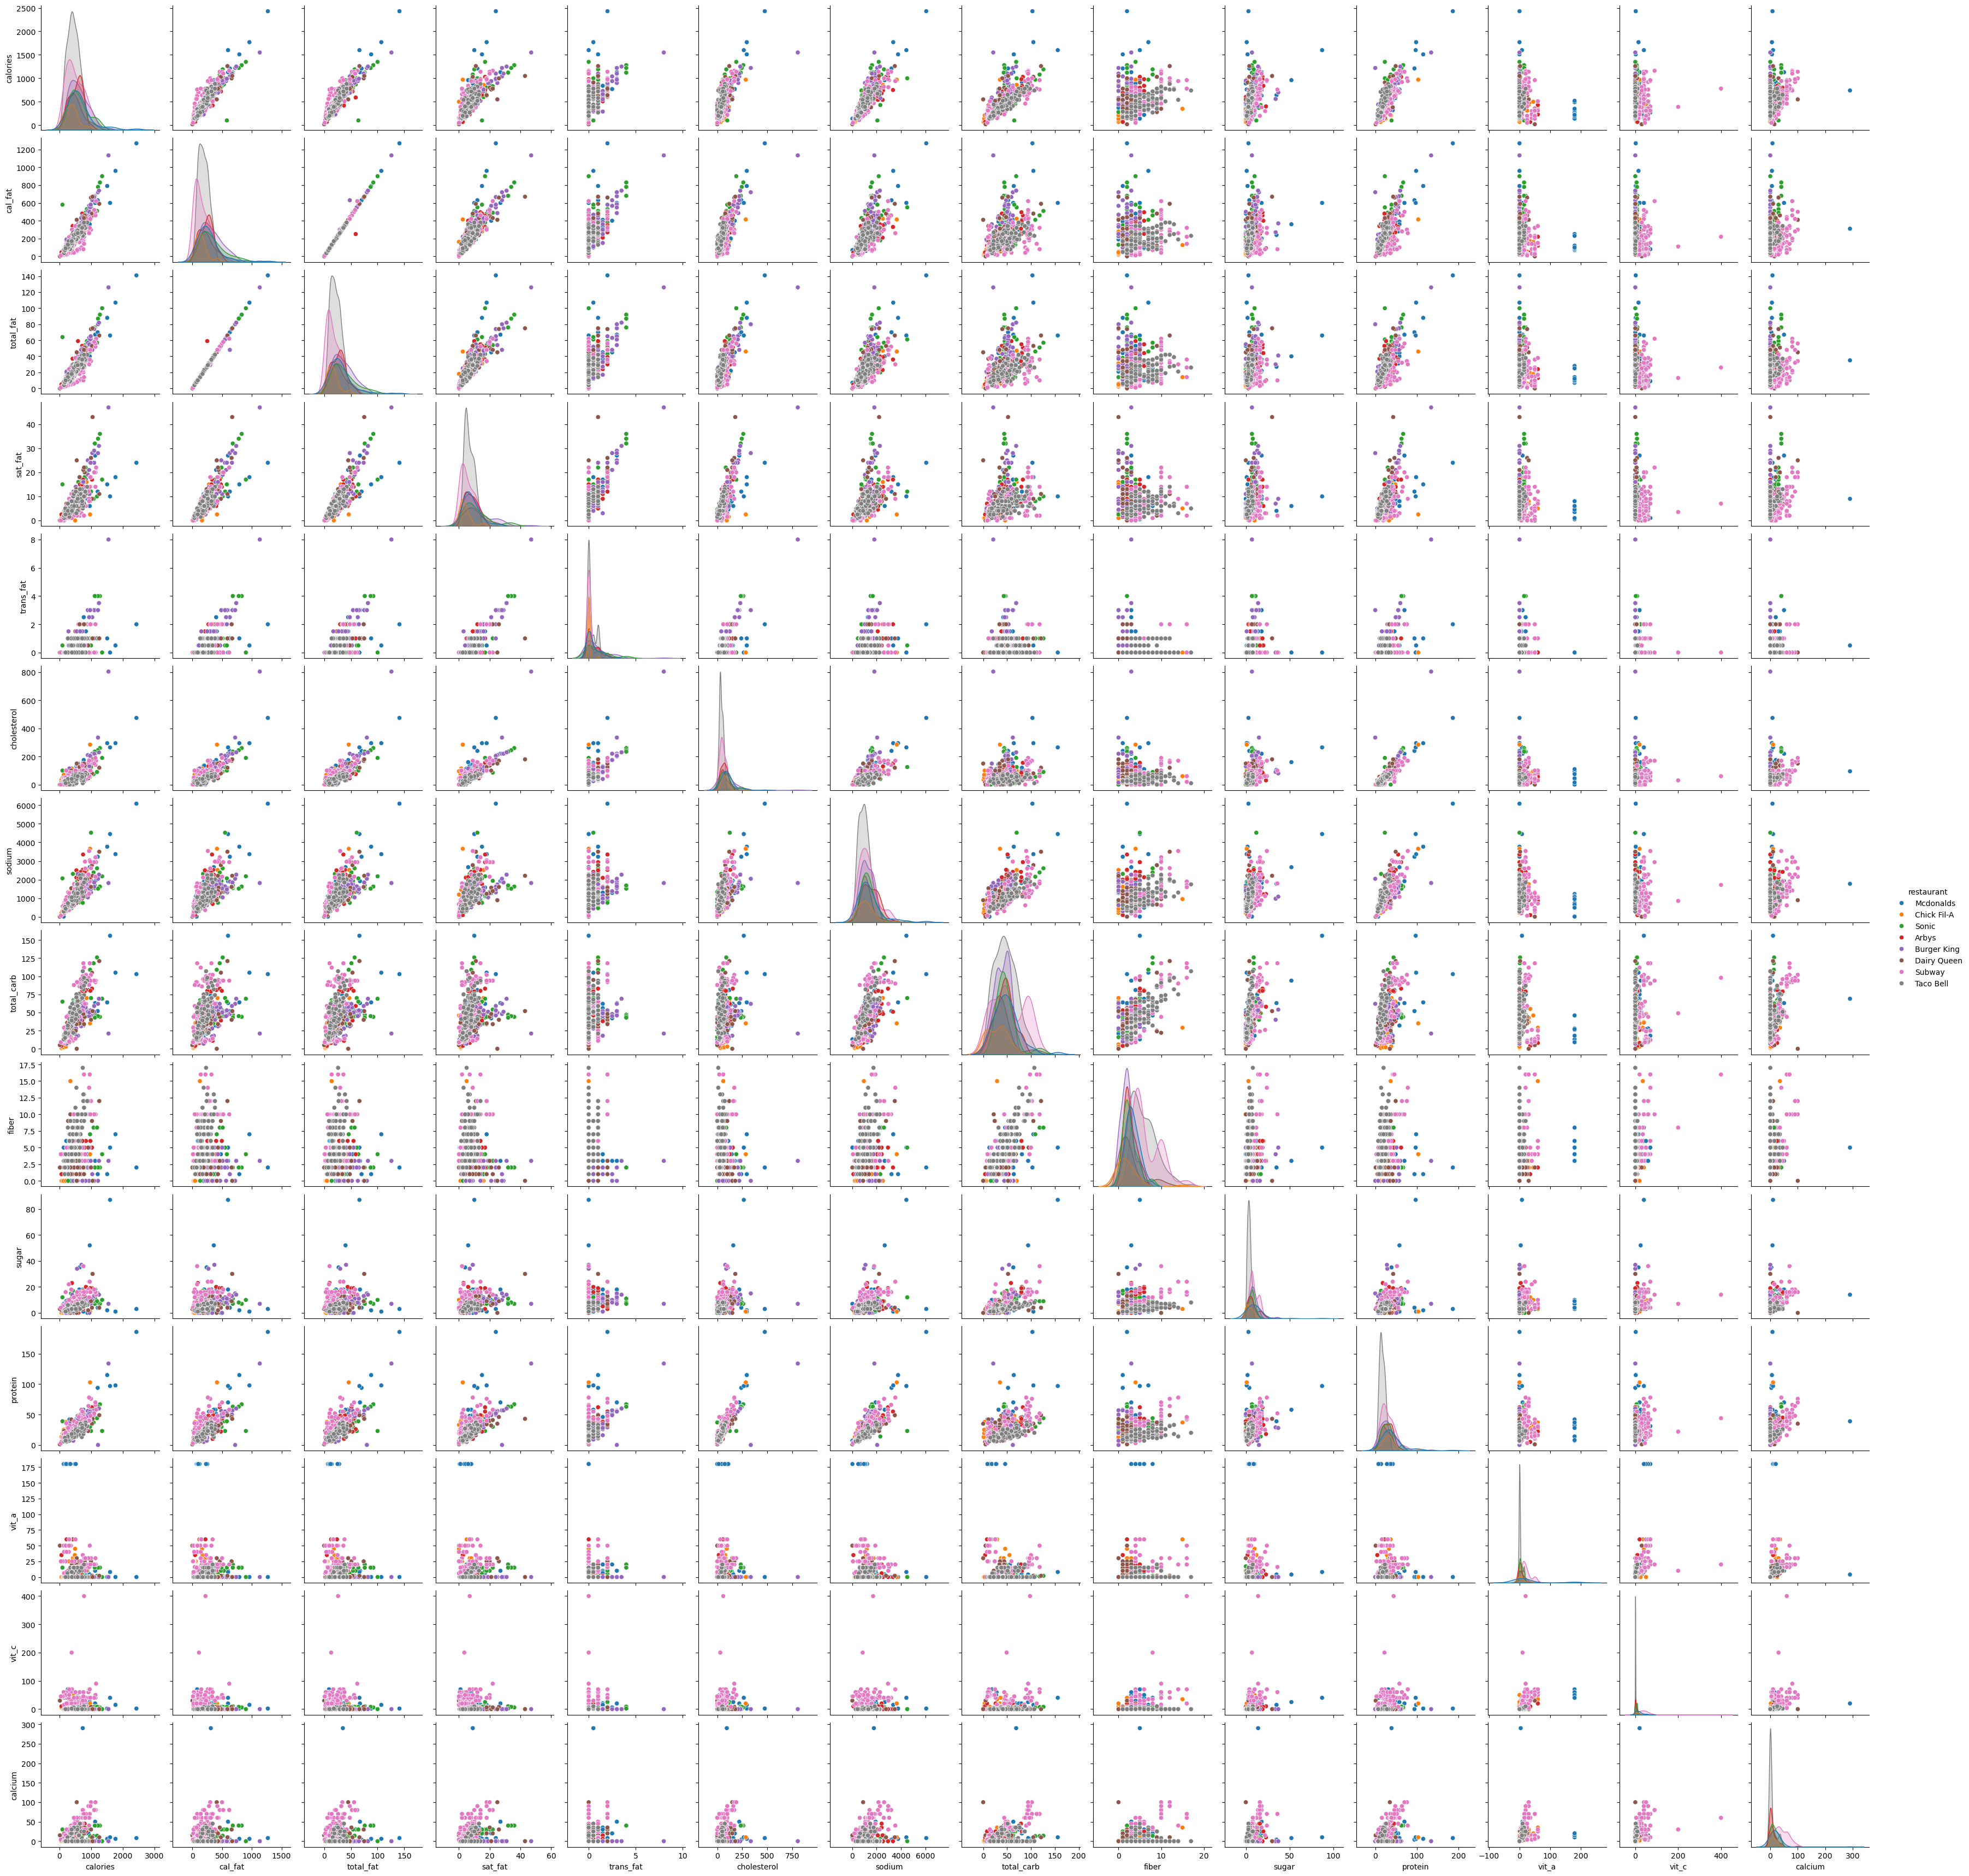

In [202]:
sns.pairplot(food, hue='restaurant')

### Embeddings comparison

In [203]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import (
    MDS,
    TSNE,
    Isomap,
    SpectralEmbedding,
)
from sklearn.pipeline import make_pipeline


umap_embeddings = umap.UMAP(n_components=2, random_state=42).fit_transform(food_df)
pca_embeddings = PCA(n_components=2, random_state=42).fit_transform(food_df)
MDS_embeddings = MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2).fit_transform(food_df)
Isomap_embeddings = Isomap(n_neighbors=30, n_components=2).fit_transform(food_df)
Spectral_embeddings = SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack").fit_transform(food_df)
tsne_embeddings = TSNE(n_components=2, n_iter=500, n_iter_without_progress=150,n_jobs=2, random_state=0).fit_transform(food_df)

C:\Users\vijay\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


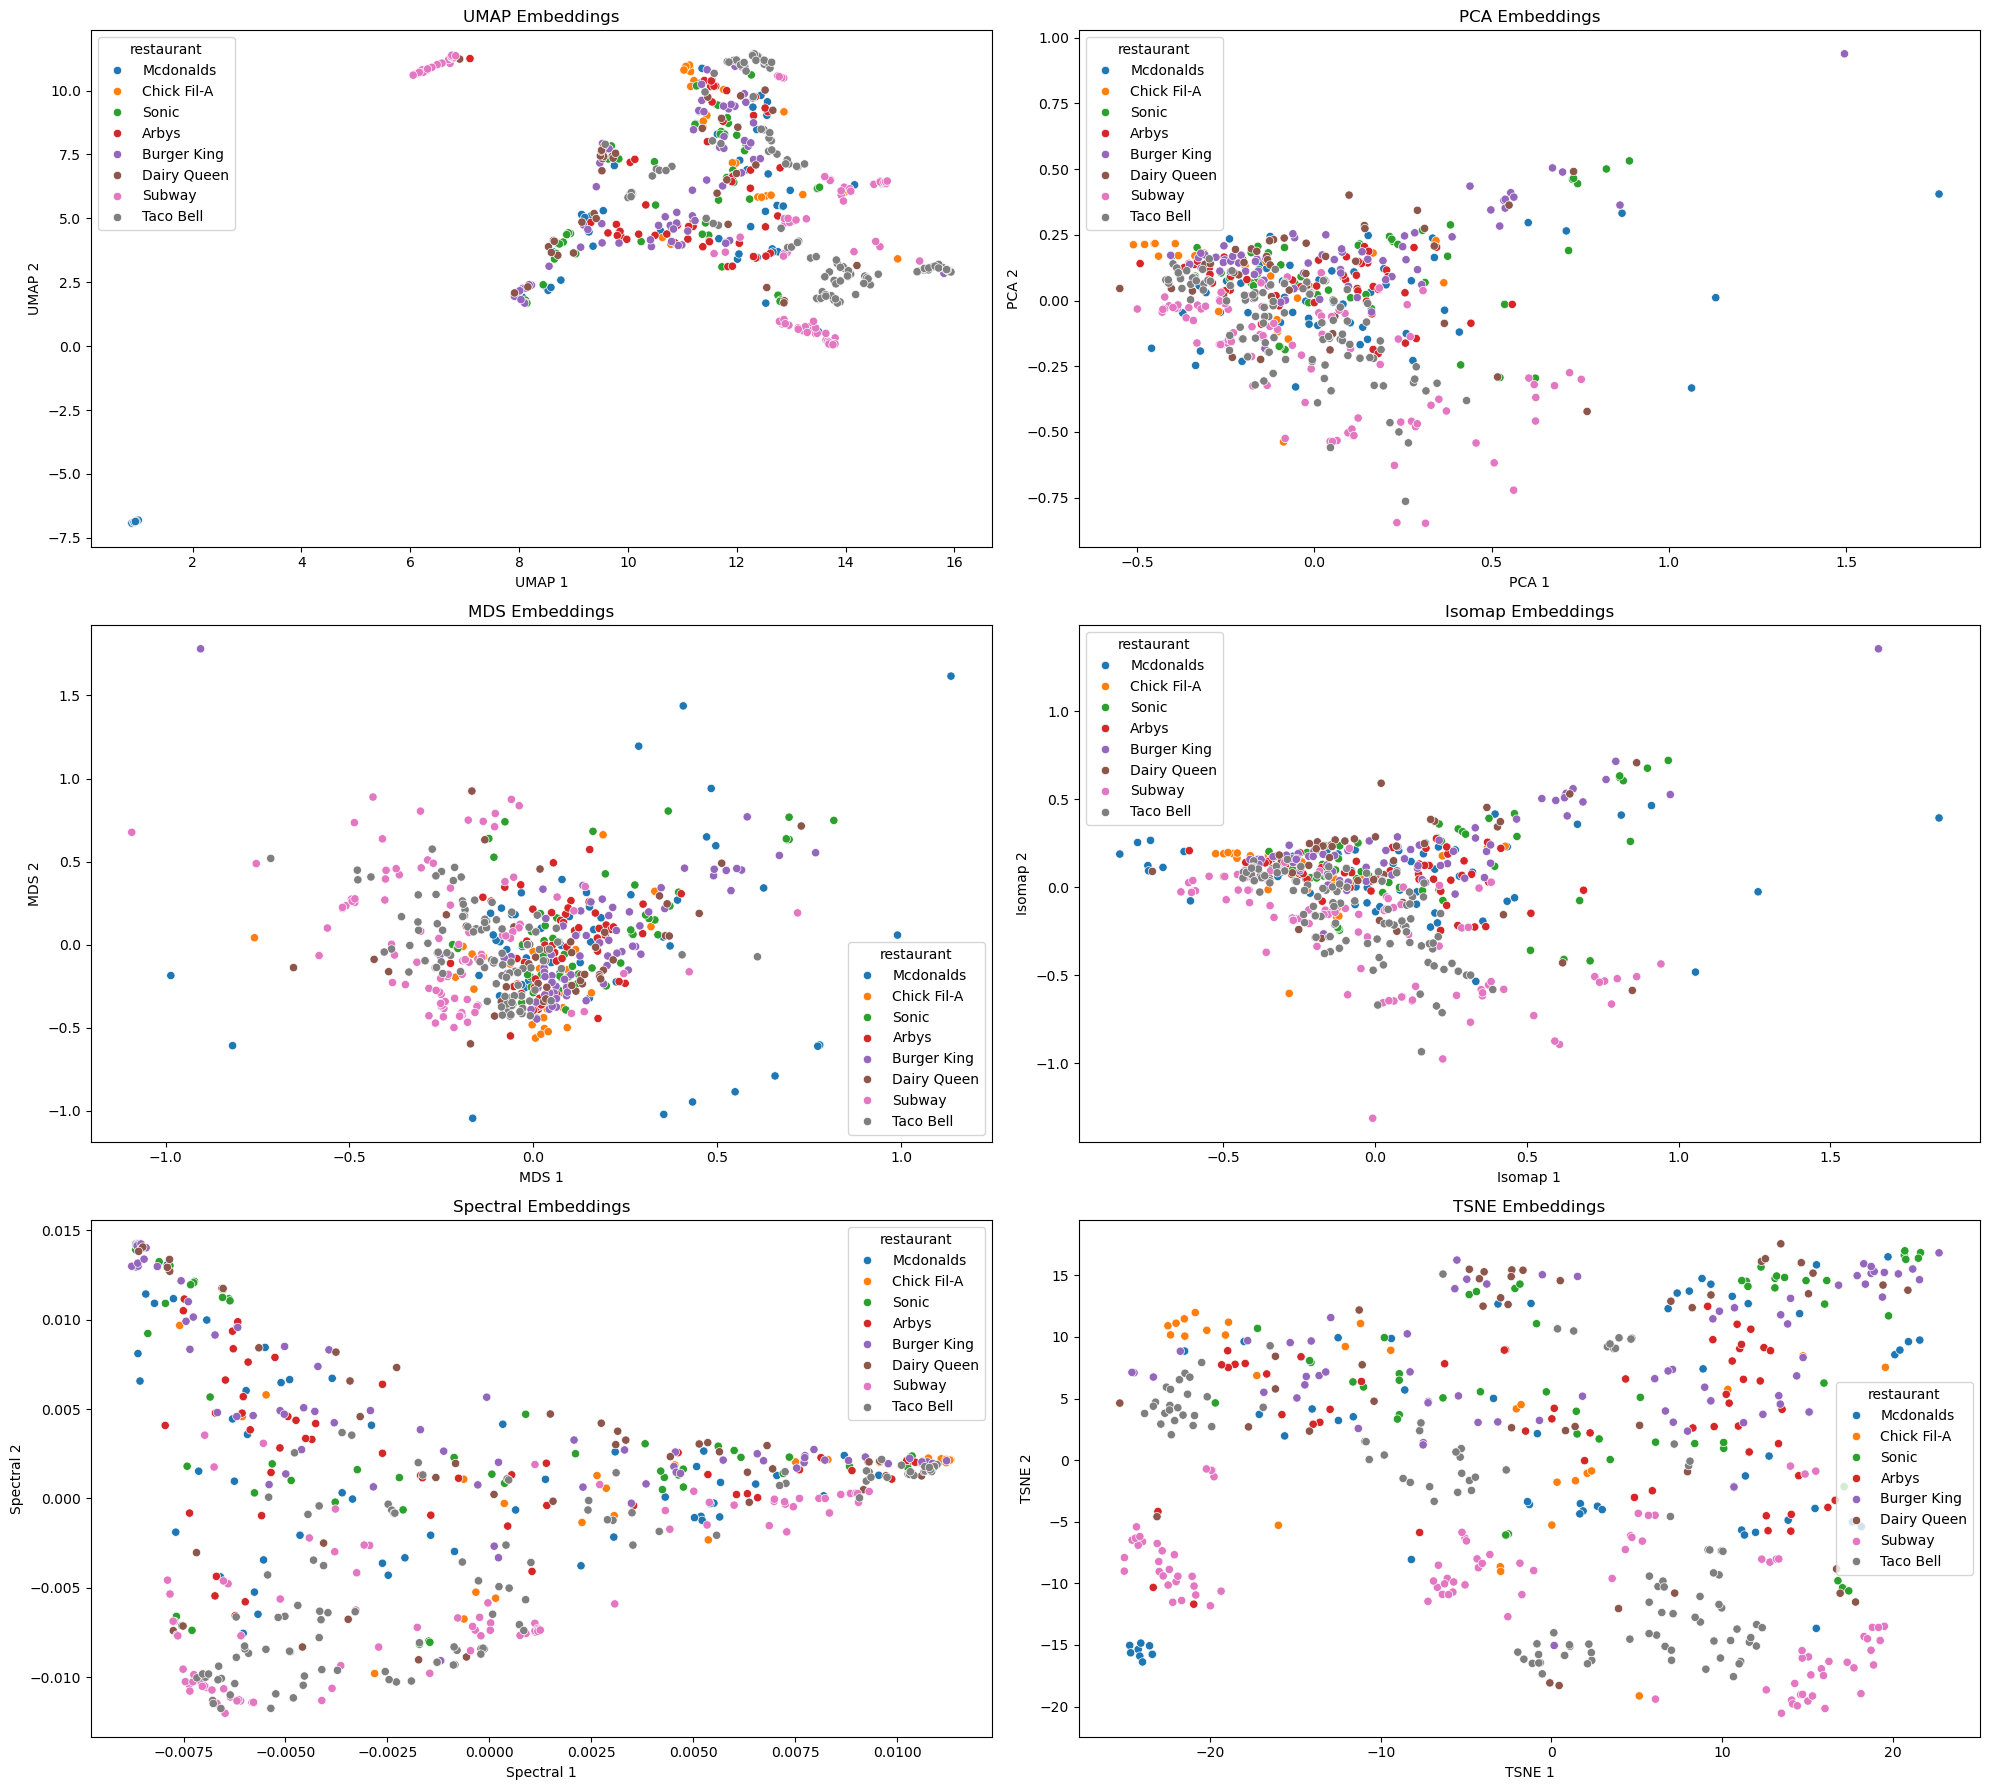

In [204]:


fig, axes = plt.subplots(3, 2, figsize=(20, 18))  # Adjust the height for better spacing

# First subplot for UMAP embeddings
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=food['restaurant'], ax=axes[0, 0])
axes[0, 0].set_title('UMAP Embeddings')
axes[0, 0].set_xlabel('UMAP 1')
axes[0, 0].set_ylabel('UMAP 2')

# Second subplot for PCA embeddings
sns.scatterplot(x=pca_embeddings[:, 0], y=pca_embeddings[:, 1], hue=food['restaurant'], ax=axes[0, 1])
axes[0, 1].set_title('PCA Embeddings')
axes[0, 1].set_xlabel('PCA 1')
axes[0, 1].set_ylabel('PCA 2')

# Third subplot for MDS embeddings
sns.scatterplot(x=MDS_embeddings[:, 0], y=MDS_embeddings[:, 1], hue=food['restaurant'], ax=axes[1, 0])
axes[1, 0].set_title('MDS Embeddings')
axes[1, 0].set_xlabel('MDS 1')
axes[1, 0].set_ylabel('MDS 2')

# Fourth subplot for Isomap embeddings
sns.scatterplot(x=Isomap_embeddings[:, 0], y=Isomap_embeddings[:, 1], hue=food['restaurant'], ax=axes[1, 1])
axes[1, 1].set_title('Isomap Embeddings')
axes[1, 1].set_xlabel('Isomap 1')
axes[1, 1].set_ylabel('Isomap 2')

# Fifth subplot for Spectral embeddings
sns.scatterplot(x=Spectral_embeddings[:, 0], y=Spectral_embeddings[:, 1], hue=food['restaurant'], ax=axes[2, 0])
axes[2, 0].set_title('Spectral Embeddings')
axes[2, 0].set_xlabel('Spectral 1')
axes[2, 0].set_ylabel('Spectral 2')

# Sixth subplot for TSNE embeddings
sns.scatterplot(x=tsne_embeddings[:, 0], y=tsne_embeddings[:, 1], hue=food['restaurant'], ax=axes[2, 1])
axes[2, 1].set_title('TSNE Embeddings')
axes[2, 1].set_xlabel('TSNE 1')
axes[2, 1].set_ylabel('TSNE 2')

plt.tight_layout()
plt.show()

#### ANALYSIS OF EMBEDDINGS

UMAP Embeddings:

Provides clear separation of clusters. Captures the non-linear structure of the data effectively. Captures both local and global structure.

PCA Embeddings:
Linear method; less clear separation of clusters. Shows some grouping but misses complex relationships.

MDS Embeddings:
Linear method; similar to PCA in terms of performance. Some grouping but not as effective for non-linear data.

IsoMAP Embeddings:
Shows potential clusters but less distinct than UMAP and t-SNE. Captures non-linear structure to some extent.

Spectral Embeddings:
Non-linear method; good separation of clusters. Sensitive to the choice of parameters.

t-SNE Embeddings:
Non-linear method; excellent local structure capture. Clear separation of clusters but can be sensitive to parameters.

Conclusion:
Best Embedding: UMAP provides the best overall separation and visualization of clusters in the dataset.
Clustering: The data appears to have non-linear relationships, and UMAP and t-SNE effectively capture these structures.
Number of Clusters: Approximately 3-4 distinct clusters are observed in the embeddings.

### Clustering

#### Elbow chart

In [205]:
K = range(1, 11)

# List to store the sum of squared distances
ssd = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(food_df)
    ssd.append(kmeans.inertia_)


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

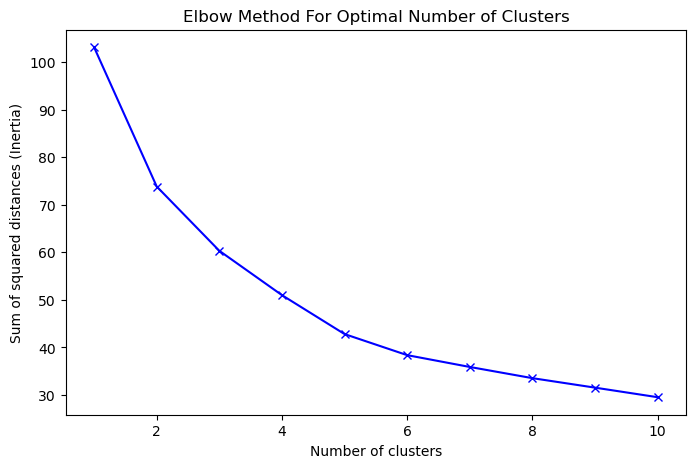

In [206]:
# Plot the elbow chart
plt.figure(figsize=(8, 5))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

#### k-means

In [217]:
# Build the k-means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
food['cluster'] = kmeans.fit_predict(food_df)

C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [210]:
food.columns

Index(['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar',
       'protein', 'vit_a', 'vit_c', 'calcium', 'cluster'],
      dtype='object')

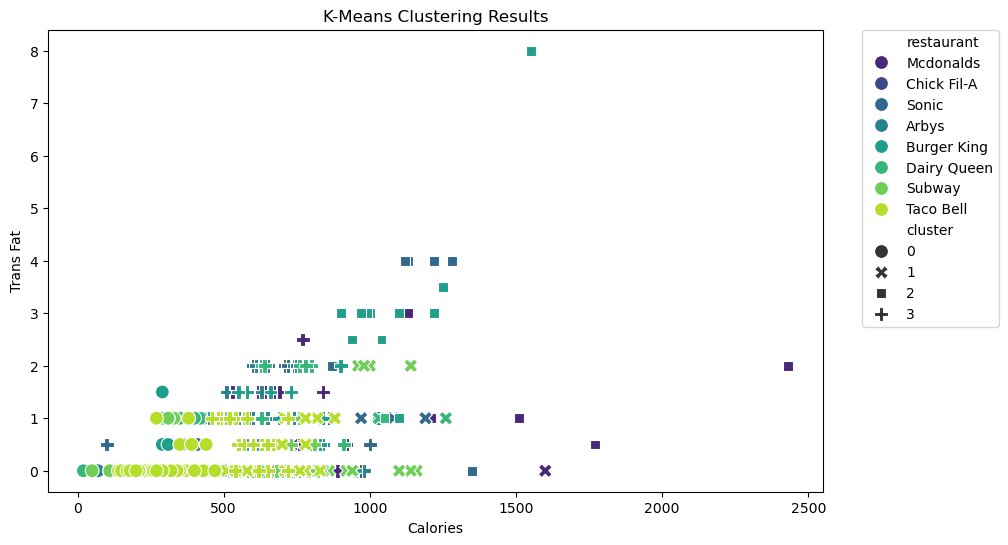

In [222]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='trans_fat', hue='restaurant', style='cluster', data=food, palette='viridis', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Calories')
plt.ylabel('Trans Fat')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

INTERPRETATION

Cluster 0: Total fat content between 20 and 75 while trans_fat ranges from 0 to 4. Restaurants that have been classified as HighFat and MedFat food items seller fall under this category.

Cluster 1: Total fat content between 0 and 68 while trans_fat ranges from 0 to 0.5. Majority of Restaurants that have been classified as MedFat food items seller fall under this category.

Cluster 2: Total fat content between 0 and 60 while trans_fat is just 0. Majority of Restaurants that have been classified as MedFat food items seller fall under this category.

Cluster 3: Total fat content between 20 and 140 while trans_fat ranges from 0 to 8. Some of the Restaurants that have been classified as MedFat food items seller and majority of sellers of HighFat foods fall under this category.

#### List of clusters and cluster members

In [223]:
# List members of each cluster by instance_name
clusters = food.groupby('cluster')['item'].apply(list).reset_index()
for index, row in clusters.iterrows():
    print(f"Cluster {row['cluster']}:")
    for instance in row['item']:
        print(f"  - {instance}")


Cluster 0:
  - Artisan Grilled Chicken Sandwich
  - Cheeseburger
  - Classic Chicken Sandwich
  - Double Cheeseburger
  - Filet-O-Fish®
  - Hamburger
  - Lobster Roll
  - McChicken
  - McDouble
  - McRib
  - 3 piece Buttermilk Crispy Chicken Tenders
  - 4 piece Buttermilk Crispy Chicken Tenders
  - 4 Piece Chicken McNuggets
  - 6 Piece Chicken McNuggets
  - 10 Piece Chicken McNuggets
  - Premium Asian Salad w/o Chicken
  - Premium Asian Salad w/ Grilled Chicken
  - Premium Asian Salad w/ Crispy Chicken
  - Premium Bacon Ranch Salad w/o Chicken
  - Premium Bacon Ranch Salad w/ Grilled Chicken
  - Premium Bacon Ranch Salad w/ Crispy Chicken
  - Premium Southwest Salad w/o Chicken
  - Premium Southwest Salad w/ Grilled Chicken
  - Premium Southwest Salad w/ Crispy Chicken
  - Chargrilled Chicken Club Sandwich
  - Chargrilled Chicken Sandwich
  - Chick-n-Slider
  - 1 Piece Chick-n-Strips
  - 2 Piece Chick-n-Strips
  - 3 Piece Chick-n-Strips
  - 4 piece Chick-n-Strips
  - 4 piece Chicken Nu

In [224]:
# Calculate the metrics
homogeneity = metrics.homogeneity_score(food['restaurant'], food['cluster'])
completeness = metrics.completeness_score(food['restaurant'], food['cluster'])
v_measure = metrics.v_measure_score(food['restaurant'], food['cluster'])
adjusted_rand = metrics.adjusted_rand_score(food['restaurant'], food['cluster'])
adjusted_mutual_info = metrics.adjusted_mutual_info_score(food['restaurant'], food['cluster'])
silhouette = metrics.silhouette_score(food_df, food['cluster'])

# Display the metrics
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}")
print(f"Adjusted Rand Index: {adjusted_rand}")
print(f"Adjusted Mutual Information Score: {adjusted_mutual_info}")
print(f"Silhouette Score: {silhouette}")

Homogeneity Score: 0.0724280928636098
Completeness Score: 0.1304366950908786
V-Measure Score: 0.09313869755439232
Adjusted Rand Index: 0.02168986154784736
Adjusted Mutual Information Score: 0.08038907159605646
Silhouette Score: 0.2662538163469071


#### DBSCAN

In [225]:
# Build a dbscan model on the ntri_processed dataset with columns Calories and Total Fat
dbscan = DBSCAN(eps=0.5, min_samples=5)
food['cluster_db'] = dbscan.fit_predict(food_df[['calories', 'trans_fat']])

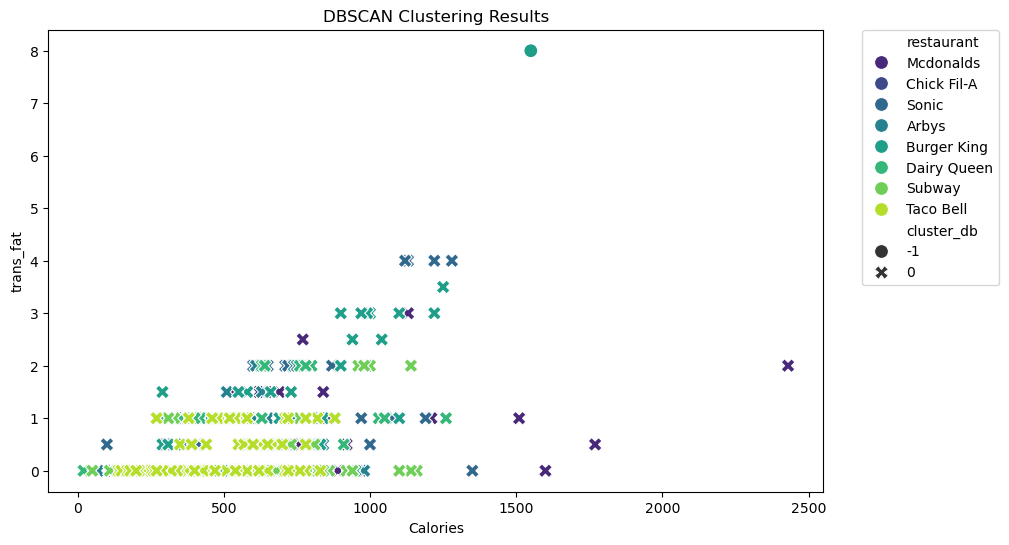

In [226]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='trans_fat', hue='restaurant', style='cluster_db', data=food, palette='viridis', s=100)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Calories')
plt.ylabel('trans_fat')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [227]:
# Calculate the metrics
homogeneity = metrics.homogeneity_score(food['restaurant'], food['cluster_db'])
completeness = metrics.completeness_score(food['restaurant'], food['cluster_db'])
v_measure = metrics.v_measure_score(food['restaurant'], food['cluster_db'])
adjusted_rand = metrics.adjusted_rand_score(food['restaurant'], food['cluster_db'])
adjusted_mutual_info = metrics.adjusted_mutual_info_score(food['restaurant'], food['cluster_db'])
silhouette = metrics.silhouette_score(food_df, food['cluster_db'])

# Display the metrics
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}")
print(f"Adjusted Rand Index: {adjusted_rand}")
print(f"Adjusted Mutual Information Score: {adjusted_mutual_info}")
print(f"Silhouette Score: {silhouette}")

Homogeneity Score: 0.0019487651819478267
Completeness Score: 0.27638040418100995
V-Measure Score: 0.003870241195871588
Adjusted Rand Index: 9.871501083110602e-05
Adjusted Mutual Information Score: 7.077523335169506e-07
Silhouette Score: 0.7199691104333394


#### Hierarchical Model

In [229]:
# Build a hierarchical clustering model on the ntri_processed dataset
hierarchical = AgglomerativeClustering(n_clusters=4)
food['cluster_hier'] = hierarchical.fit_predict(food_df)

In [230]:
!pip install squarify

  Obtaining dependency information for squarify from https://files.pythonhosted.org/packages/b7/3c/eedbe9fb07cc20fd9a8423da14b03bc270d0570b3ba9174a4497156a2152/squarify-0.4.4-py3-none-any.whl.metadata


In [231]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import squarify

In [232]:
# Create linkage matrix for dendrogram
linked = linkage(food_df, method='ward')

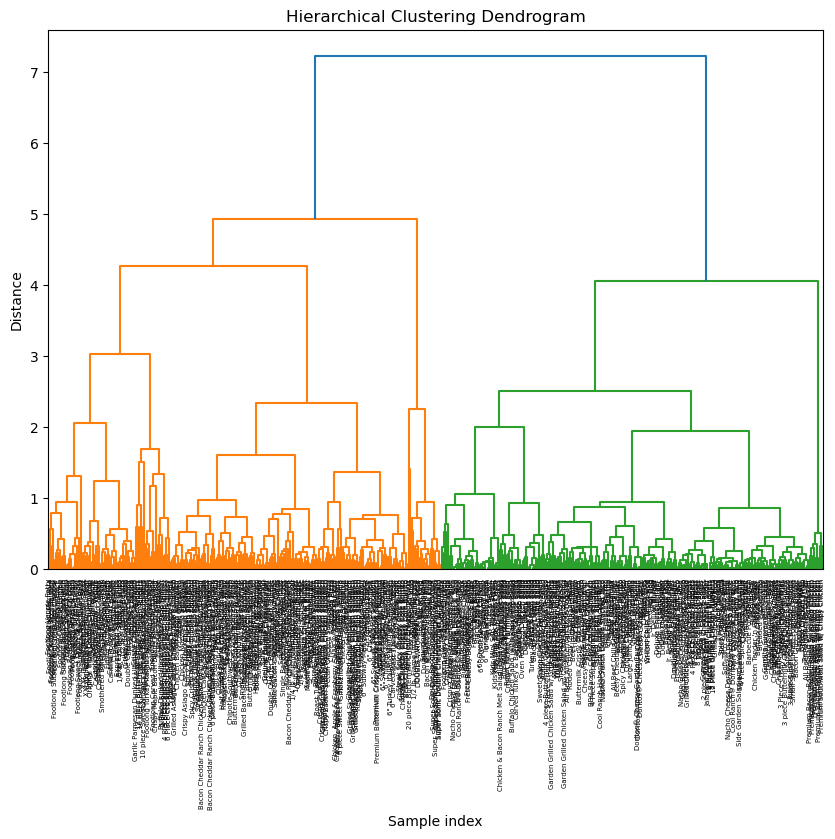

In [233]:
# Create dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=food['item'].to_numpy(), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

#### List of clusters and cluster members

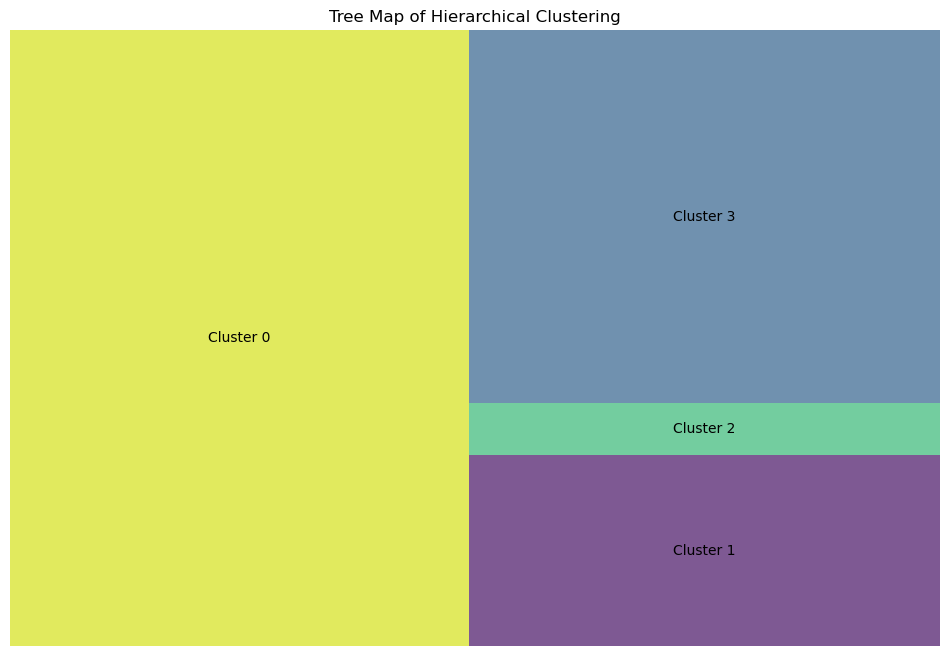

Cluster 0:
  - Cheeseburger
  - Classic Chicken Sandwich
  - Double Cheeseburger
  - Filet-O-Fish®
  - Hamburger
  - Lobster Roll
  - McChicken
  - McDouble
  - McRib
  - 3 piece Buttermilk Crispy Chicken Tenders
  - 4 piece Buttermilk Crispy Chicken Tenders
  - 4 Piece Chicken McNuggets
  - 6 Piece Chicken McNuggets
  - 10 Piece Chicken McNuggets
  - Premium Asian Salad w/o Chicken
  - Premium Asian Salad w/ Grilled Chicken
  - Premium Asian Salad w/ Crispy Chicken
  - Premium Bacon Ranch Salad w/o Chicken
  - Premium Bacon Ranch Salad w/ Grilled Chicken
  - Premium Bacon Ranch Salad w/ Crispy Chicken
  - Premium Southwest Salad w/o Chicken
  - Premium Southwest Salad w/ Grilled Chicken
  - Premium Southwest Salad w/ Crispy Chicken
  - Chargrilled Chicken Sandwich
  - Chick-n-Slider
  - 1 Piece Chick-n-Strips
  - 2 Piece Chick-n-Strips
  - 3 Piece Chick-n-Strips
  - 4 piece Chick-n-Strips
  - 4 piece Chicken Nuggets
  - 6 piece Chicken Nuggets
  - 8 piece Chicken Nuggets
  - 12 piece 

In [234]:
# Tree map visualization
sizes = food['cluster_hier'].value_counts().sort_index()
labels = [f'Cluster {i}' for i in sizes.index]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.7)
plt.title('Tree Map of Hierarchical Clustering')
plt.axis('off')
plt.show()

# Display the clusters
clusters_hierarchical = food.groupby('cluster_hier')['item'].apply(list).reset_index()
for index, row in clusters_hierarchical.iterrows():
    print(f"Cluster {row['cluster_hier']}:")
    for instance in row['item']:
        print(f"  - {instance}")